In [400]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import show

import sklearn.preprocessing as preprocessing

%matplotlib inline
sns.set_context('notebook')
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500) # to see all columns

In [401]:
data = pd.read_csv('CrowdstormingDataJuly1st.csv')
data_total = data.copy()
print('Number of dayads', data.shape)
data.head()

Number of dayads (146028, 28)


,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,1,0,0,1,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,0,0,0,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,0,0,0,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


# 1. Observation and clean of the data

In [402]:
print('Number of diad: ', len(data))
print('Number of players: ', len(data.playerShort.unique()))
print('Number of referees: ', len(data.refNum.unique()))

Number of diad:  146028
Number of players:  2053
Number of referees:  3147


## 1.1. Missing values

In [403]:
complete = len(data.dropna())
all_ = len(data_total)
print('Number of row with complete data: {} ({:.3f}%)'.format(complete, (complete/all_ ) * 100 ))
print('Number of row with missing data: {} ({:.3f}%)'.format(all_-complete, (all_ -complete)/all_  * 100 ))


Number of row with complete data: 115457 (79.065%)
Number of row with missing data: 30571 (20.935%)


### Where are the missing values ?

In [404]:
def find_col_nan(d):
    col = []
    for c in d.columns:
        if d[c].isnull().any():
            col = np.append(col, c)
    return col        

In [405]:
missing_col = find_col_nan(data)
missing_col

array(['height', 'weight', 'position', 'photoID', 'rater1', 'rater2',
       'Alpha_3', 'meanIAT', 'nIAT', 'seIAT', 'meanExp', 'nExp', 'seExp'], 
      dtype='<U32')

To clean the data, we will go step by step:
    - First of all we have to clean all dayads that don't have any rating, because those dayads are uneseful for our problem.
    - Then we will look again which columns contains missing values and how to deal with them

In [446]:
data = data[ ~data.rater1.isnull() & ~data.rater2.isnull()]
print('Number of row with the 2 ratings {} ({:.3f}%)'.format(len(data), len(data)/len(data_total) * 100))
onlyOne = data[ ~data.rater1.isnull() ^ ~data.rater2.isnull()]
print('Number of row with only one ratings {} ({:.3f}%)'.format(len(onlyOne), len(onlyOne)/len(data_total) * 100))


Number of row with the 2 ratings 124468 (85.236%)
Number of row with only one ratings 0 (0.000%)


Check now how many incomplete dayads our data contains now

In [407]:
complete = len(data.dropna())
all_ = len(data)
print("After removing data without rating:")
print("-----------------------------------")
print('Number of row with complete data: {} ({:.3f}%)'.format(complete, (complete/all_ ) * 100 ))
print('Number of row with missing data: {} ({:.3f}%)'.format(all_-complete, (all_ -complete)/all_  * 100 ))

After removing data without rating:
-----------------------------------
Number of row with complete data: 115457 (92.647%)
Number of row with missing data: 9164 (7.353%)


Let's check again the columns with missing values

In [408]:
missing_col = find_col_nan(data)
missing_col

array(['height', 'weight', 'position', 'Alpha_3', 'meanIAT', 'nIAT',
       'seIAT', 'meanExp', 'nExp', 'seExp'], 
      dtype='<U32')

We only 7.4% of incomplete dayads. Let's try to replace the nan in heights and weights with the median

In [409]:
# replace no height and weight with the mean value
median_height = np.median(data['height'].dropna())
median_weight = np.median(data['weight'].dropna())
data['height'] = data['height'].fillna(value=median_height)
data['weight'] = data['weight'].fillna(value=median_weight)

In [410]:
complete = len(data.dropna())
all_ = len(data)
print("After removing data without rating:")
print("-----------------------------------")
print('Number of row with complete data: {} ({:.3f}%)'.format(complete, (complete/all_ ) * 100 ))
print('Number of row with missing data: {} ({:.3f}%)'.format(all_-complete, (all_ -complete)/all_  * 100 ))

After removing data without rating:
-----------------------------------
Number of row with complete data: 116014 (93.093%)
Number of row with missing data: 8607 (6.907%)


In [411]:
missing_col = find_col_nan(data)
missing_col

array(['position', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT', 'meanExp',
       'nExp', 'seExp'], 
      dtype='<U32')

The incomplete row only represent 7%.
We will check if 2 dayads with referee of the same country, one with complete data and an other one with missing IAT and Exp info exist. In that case it is easy to complete those information

In [412]:
missing_col_test = ['meanIAT', 'nIAT', 'seIAT', 'meanExp',
       'nExp', 'seExp']
exist = False
def checkMissingTest(df):
    for col in missing_col_test:
        nbr_dayads = len(df)
        nbr_noNaN = len(df.dropna(subset=[col]))
        if nbr_dayads > nbr_noNaN &  nbr_noNaN > 0:
            exist = True
            print('There exist valid data for ', df.Alpha_3)
grouped = pd.groupby(data, by='refCountry').apply(checkMissingTest)      
print('Does it exist 2 dayads of same country, one with info on test and one with missing values in test ?: ', exist)

Does it exist 2 dayads of same country, one with info on test and one with missing values in test ?:  False


Look at how many player don't have a position

In [413]:
complete = len(data.dropna(subset=['position']))
all_ = len(data)
print("After removing data without rating:")
print("-----------------------------------")
print('Number of row with complete data: {} ({:.3f}%)'.format(complete, (complete/all_ ) * 100 ))
print('Number of row with missing data: {} ({:.3f}%)'.format(all_-complete, (all_ -complete)/all_  * 100 ))

After removing data without rating:
-----------------------------------
Number of row with complete data: 116160 (93.211%)
Number of row with missing data: 8461 (6.789%)


For those player we will try to assign them a new position called 'Joker'

In [414]:
data.position = data.position.fillna('Joker')

In [415]:
missing_col = find_col_nan(data)
missing_col

array(['Alpha_3', 'meanIAT', 'nIAT', 'seIAT', 'meanExp', 'nExp', 'seExp'], 
      dtype='<U32')

In [416]:
complete = len(data.dropna())
all_ = len(data)
print("After removing data without rating:")
print("-----------------------------------")
print('Number of row with complete data: {} ({:.3f}%)'.format(complete, (complete/all_ ) * 100 ))
print('Number of row with missing data: {} ({:.3f}%)'.format(all_-complete, (all_ -complete)/all_  * 100 ))

After removing data without rating:
-----------------------------------
Number of row with complete data: 124468 (99.877%)
Number of row with missing data: 153 (0.123%)


The remaining NaN represent only 0.1% and concern the columns about country and the test in those country which are hard to guess. So we deceide to drop the remaining dayad with NaN

In [417]:
data = data.dropna()
find_col_nan(data)


[]

## 1.2. Handling different ratings (rater1 vs rater2)
- We check if there is player with only one rating
- We also check if one rater always give the same rate to the same player
- Now we need to take one single rating for each row. We'll need to investigate a bit more the different rating



- what rating to take:
    - take the rating of the rater where less dissagreement happend. (rater2->0, rater1->1, rater2->2, rater2->3, rater1->4) so if rater2 rated 0 take it... (in order 4, 0, 1, 2, 3)
    - compare taking only rater1 vs rater2
    - make a colum 'color_rating' and remove the other two
    

Is there players with only one rating?

In [418]:
(data.rater1.isnull() | data.rater2.isnull()).any()

False

Are the raters consistent?

In [419]:
def areRaterConsistent(d):
    for playerID in d.playerShort.unique():
  
        player = d[d.playerShort == playerID]
        rater1 = player.rater1.unique()
        rater2 = player.rater2.unique()
        if len(rater1) >1 or len(rater2) > 1:
            return False
    return True  

In [420]:
print("Are the rater consistent: ",areRaterConsistent(data))

Are the rater consistent:  True


### Investigation on the raters

Values of the rating

In [421]:
data.rater1.unique()

array([ 0.25,  0.75,  0.  ,  1.  ,  0.5 ])

Are the raters always agree

In [422]:
print("percentage of players with different ratings: ", len(data[data['rater1'] != data['rater2']])*100 / len(data), "%")

percentage of players with different ratings:  23.18989619821962 %


Let's show some plost to visualize when the rater differe

In [423]:
len(data)

124468

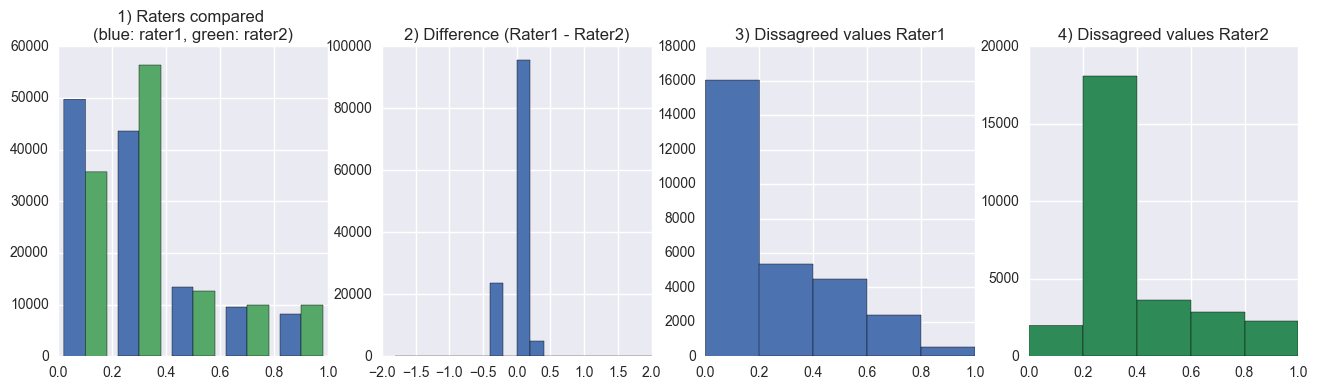

In [424]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
ax[0].hist([data['rater1'], data['rater2']], bins=5)
ax[0].set_title("1) Raters compared \n(blue: rater1, green: rater2)")

ax[1].hist(data['rater1'] - data['rater2'], bins=20, range=(-2,2))
ax[1].set_title("2) Difference (Rater1 - Rater2)")

dissagree_data = data[data['rater1'] != data['rater2']]
ax[2].hist(dissagree_data['rater1'], bins=5)
ax[2].set_title("3) Dissagreed values Rater1")

ax[3].hist(dissagree_data['rater2'], bins=5, color='seagreen')
ax[3].set_title("4) Dissagreed values Rater2")

We can see that rater1 and 2 disagree the most when they have to rate "white" people.

We can also see with graph2 that when there disagree it's ony of one category.


Now we will create a new columns: color_skin that will be our label to guess. To convert the values of rater 1 and 2 in one rate, we need to follow some rules that come from the graph:
    1. if rater1 and rater2 are agree, take that value
    2. We can see on graph 4 that when rater2 give 0, usually, rater1 agrees => so when rater2 give 0, we take that value as the color skin
    3. In graph 3, when rater1 give 1, rater2 usually agrees => when rater1 give 1, take that value as the color_skin
    4. In graph 3, we can see that when rater1 rate1 give 0.25, usually rater2 agrees => take rater1
    5. choose at random between both values
    
    

In [425]:
data['color_rating'] = -1

In [426]:
def color_skin_rules(row):
    #Rule 1
    if row.rater1 == row.rater2:
        return row.rater1
    #Rule2    
    elif row.rater2 == 0:
        return 0
    #Rule 3
    elif row.rater1 == 1:
        return 1
    #Rule 4
    elif row.rater1 == 0.25:
        return 0.25
    else: 
        return np.random.choice([row.rater1, row.rater2])
data.color_rating = data.apply(color_skin_rules, axis=1)


# 2. Train the model  

Now we train and test our model using cross-validation. First of all we must encode all the features that contains string.

For this first model, we will use all the features (except rater1,rater2, color_rating) and then we will observe which are the most important features
 

In [427]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing as pp
from sklearn.model_selection import KFold , cross_val_score
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score

In [428]:
# encoders
le = pp.LabelEncoder() # for playernames etc.
ohe = pp.OneHotEncoder() # for categories with 'few' categories

In [436]:
rf_input_data = data.copy()

rf_input_data['player'] = le.fit_transform(data['player'])
rf_input_data['club'] = le.fit_transform(data['club'])
rf_input_data['leagueCountry'] = le.fit_transform(data['leagueCountry'])
rf_input_data['birthday'] = le.fit_transform(data['birthday'])
rf_input_data['position'] = le.fit_transform(data['position'])
rf_input_data['color_rating'] = le.fit_transform(data['color_rating'])
rf_input_data['Alpha_3'] = le.fit_transform(data['Alpha_3'])
rf_input_data['photoID'] = le.fit_transform(data['photoID'])
rf_input_data['playerShort'] = le.fit_transform(data['playerShort'])
rf_input_data.head(1)

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,color_rating
0,901,1046,70,3,1382,177.0,72.0,0,1,0,0,1,0,0,0,0,1532,0.25,0.5,1,1,59,0.326391,712.0,0.000564,0.396,750.0,0.002696,1


In [437]:
player_colors = rf_input_data['color_rating']
rf_input_data = rf_input_data.drop(['rater1', 'rater2', 'color_rating'], axis=1) 

rf_input_data.dtypes

playerShort        int64
player             int64
club               int64
leagueCountry      int64
birthday           int64
height           float64
weight           float64
position           int64
games              int64
victories          int64
ties               int64
defeats            int64
goals              int64
yellowCards        int64
yellowReds         int64
redCards           int64
photoID            int64
refNum             int64
refCountry         int64
Alpha_3            int64
meanIAT          float64
nIAT             float64
seIAT            float64
meanExp          float64
nExp             float64
seExp            float64
dtype: object

In [438]:
rf = RandomForestClassifier()
# roc_scorer = make_scorer(roc_curve)
X = rf_input_data
y = player_colors
result = cross_val_score(rf, X, y, cv=10, n_jobs=3, pre_dispatch='n_jobs+1', verbose=3)

"""
kf = KFold(n_splits=10)
for train, test in kf.split(rf_input_data):
    X_train, X_test, y_train, y_test = rf_input_data[train], rf_input_data[test], player_colors[train], player_colors[test]
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
"""

result

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ....................................... , score=0.905053 -   0.1s
[CV] ....................................... , score=0.904804 -   0.1s
[CV] ....................................... , score=0.906652 -   0.1s
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ....................................... , score=0.906411 -   0.1s
[CV] ....................................... , score=0.902145 -   0.1s
[CV]  ................................................................
[CV]  ................................................................
[CV] ....................................... , score=0.907287 -   0.1s
[CV]  

[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   15.3s finished


array([ 0.90505261,  0.90665167,  0.90480398,  0.90641067,  0.9021451 ,
        0.9072869 ,  0.90351089,  0.90711129,  0.90148654,  0.84329797])

## Observe the important features

Feature ranking:
1. feature n° 16 photoID (0.121465)
2. feature n° 1 player (0.116455)
3. feature n° 4 birthday (0.107641)
4. feature n° 0 playerShort (0.105967)
5. feature n° 2 club (0.095871)
6. feature n° 5 height (0.093122)
7. feature n° 6 weight (0.092604)
8. feature n° 7 position (0.072177)
9. feature n° 17 refNum (0.042796)
10. feature n° 3 leagueCountry (0.031501)
11. feature n° 8 games (0.014344)
12. feature n° 9 victories (0.013300)
13. feature n° 11 defeats (0.010950)
14. feature n° 10 ties (0.009832)
15. feature n° 22 seIAT (0.007753)
16. feature n° 24 nExp (0.007667)
17. feature n° 13 yellowCards (0.007566)
18. feature n° 12 goals (0.007535)
19. feature n° 23 meanExp (0.007503)
20. feature n° 20 meanIAT (0.007254)
21. feature n° 19 Alpha_3 (0.007196)
22. feature n° 18 refCountry (0.006786)
23. feature n° 21 nIAT (0.006240)
24. feature n° 25 seExp (0.005346)
25. feature n° 15 redCards (0.000584)
26. feature n° 14 yellowReds (0.000546)


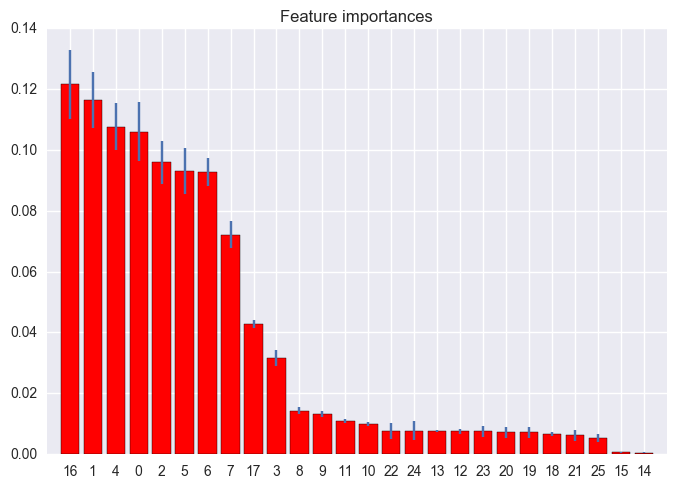

In [439]:
rf.fit(X, y)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

cols = rf_input_data.columns
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature n° %d %s (%f)" % (f + 1, indices[f], cols[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()  

We can see that the most important features are:
    - photoID
    - player
    - the birthday
    - playerShort
    
The result obtained is weird. Indeed, those 4 features seem to be independant of the color skin and they shloud also be unique to one player. PhotoID is the id of the photo and thus unique for one player. Same about 'player' and 'playerShort'. Birthday is not necessarily unique, but should not be that important in the classification of player.

We have to remember that our data contains dayads between player and referee, so it's mean that a player can appear several time in our data. It could be the reason why the name is deterministic. let's see some fact about the data

In [445]:
data.playerShort.value_counts()[:10]

djibril-cisse           202
john-arne-riise         197
javier-saviola          196
giorgios-karagounis     195
xavi                    188
helder-postiga          183
rafael-van-der-vaart    181
zlatan-ibrahimovic      181
simao                   180
ian-harte               177
Name: playerShort, dtype: int64

Indeed, some player appear 200 times, so it is easy to determine the color skin of djibril cisse if he appears both in the training set and in the test set. But in the reality the probability to have 2 djibril cisse with the same birthday and same color skin is almost null

# Drop some important Feature

In [441]:
rf_input_data_drop = rf_input_data.drop(['birthday', 'player','playerShort', 'photoID'], axis=1) 

rf_input_data_drop.dtypes

club               int64
leagueCountry      int64
height           float64
weight           float64
position           int64
games              int64
victories          int64
ties               int64
defeats            int64
goals              int64
yellowCards        int64
yellowReds         int64
redCards           int64
refNum             int64
refCountry         int64
Alpha_3            int64
meanIAT          float64
nIAT             float64
seIAT            float64
meanExp          float64
nExp             float64
seExp            float64
dtype: object

In [442]:
rf = RandomForestClassifier()
# roc_scorer = make_scorer(roc_curve)
X = rf_input_data_drop
y = player_colors
result = cross_val_score(rf, X, y, cv=10, n_jobs=3, pre_dispatch='n_jobs+1', verbose=3)

"""
kf = KFold(n_splits=10)
for train, test in kf.split(rf_input_data):
    X_train, X_test, y_train, y_test = rf_input_data[train], rf_input_data[test], player_colors[train], player_colors[test]
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
"""

result

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ....................................... , score=0.771548 -   0.1s
[CV] ....................................... , score=0.866324 -   0.1s
[CV]  ................................................................
[CV]  ................................................................
[CV] ....................................... , score=0.844312 -   0.1s
[CV]  ................................................................
[CV] ....................................... , score=0.835382 -   0.1s
[CV]  ................................................................
[CV] ....................................... , score=0.857969 -   0.1s
[CV]  ................................................................
[CV] ....................................... , score=0.851450 -   0.1s
[CV]  

[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   13.5s finished


array([ 0.77154792,  0.86632391,  0.84431234,  0.85796915,  0.83538202,
        0.85145015,  0.84438017,  0.87472881,  0.84114102,  0.73199936])

Feature ranking:
1. feature n° 3 weight (0.178321)
2. feature n° 2 height (0.174316)
3. feature n° 0 club (0.174290)
4. feature n° 4 position (0.132921)
5. feature n° 13 refNum (0.077175)
6. feature n° 1 leagueCountry (0.036401)
7. feature n° 5 games (0.030830)
8. feature n° 6 victories (0.027916)
9. feature n° 8 defeats (0.023867)
10. feature n° 7 ties (0.021034)
11. feature n° 10 yellowCards (0.018037)
12. feature n° 9 goals (0.017238)
13. feature n° 18 seIAT (0.011981)
14. feature n° 14 refCountry (0.010734)
15. feature n° 19 meanExp (0.010651)
16. feature n° 16 meanIAT (0.010496)
17. feature n° 21 seExp (0.010422)
18. feature n° 17 nIAT (0.010355)
19. feature n° 15 Alpha_3 (0.010340)
20. feature n° 20 nExp (0.009356)
21. feature n° 12 redCards (0.001790)
22. feature n° 11 yellowReds (0.001528)


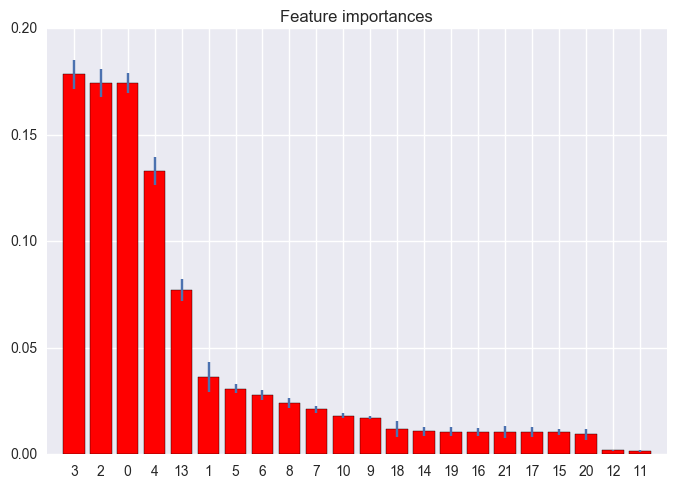

In [444]:
rf.fit(X, y)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

cols = rf_input_data_drop.columns
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature n° %d %s (%f)" % (f + 1, indices[f], cols[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()  

# Aggregate the data

One solution is to group the data by player name. Then we need to find a solution to correctly group the remaining features:
    - club: we have to check if a player appear in 2 different club (in case of a transfer during the winter mercato ) or if the transfer are not taking into account. (-> one (several) hot encoding. or majority dyads per club)
    - leagueCountry: same as club
    - position: test if the player as different -> position with the majority of game? 
    - photoID: drop that information, the id is unique -> not relevant for our classification probleme
    - refNum: replace with the total of unique refs
    - refCountry: same as refNum
    - Alpha_3: remove: redundant information since it correspond to the refCountry
    - meanIAT: make new features
        - take mean 
        - take weighted mean (weight with nIAT)
        - take weighted mean (weight with game numers)
    - meanExp: same as IAT
    - seAIT: 
    - seExp:

In [135]:
data.columns

Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp', 'color_rating'],
      dtype='object')

In [309]:
def checkFunction(player):

    #check if the club is unique for one player
    if len(player.club.unique()) > 1:
        clubUnique = False
        print(player.player, 'plays for more than one team: ', player.club.unique())
    #check if the leagueCountry is unique
    if len(player.leagueCountry.unique()) > 1:
        leagueUnique = False
        print(player.player, 'plays for more than one league: ', player.leagueCountry.unique())
    #check if the position is unique
    if len(player.position.unique()) > 1:
        positionUnique = False
        print(player.player, 'plays for more than one position: ', player.position.unique())
           
data_group = pd.groupby(data, by=data.playerShort).apply(checkFunction)
print("Is the club for a player unique? ", clubUnique)
print("Is the league for a player unique? ", leagueUnique)
print("Is the position for a player unique? ", positionUnique)


Is the club for a player unique?  True
Is the league for a player unique?  True
Is the position for a player unique?  True


List of the columns

In [310]:
data.columns

Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp', 'color_rating'],
      dtype='object')

In [342]:
def aggreagtion(df):
    first_entry = df.head(1)
    # new aggregation entry
    new_entry = first_entry.copy()
    
    #sum of the info about the games
    new_entry.games = df.games.sum()
    new_entry.victories = df.victories.sum()
    new_entry.ties = df.ties.sum()
    new_entry.defeats = df.defeats.sum()
    new_entry.goals = df.goals.sum()
    new_entry.yellowCards = df.yellowCards.sum()
    new_entry.yellowReds = df.yellowReds.sum()
    new_entry.redCards = df.redCards.sum()
    
    #drop photoID and alpha_3
    new_entry.drop('photoID', inplace = True, axis=1)
    new_entry.drop('Alpha_3', inplace = True, axis=1)
    #refNum: number of unique ref
    new_entry = new_entry.rename(columns = {'refNum': 'refCount'})
    new_entry.refCount = len(df.refNum.unique()) 
    #refCountry: replace by number of unique country
    new_entry = new_entry.rename(columns = {'refCountry': 'refCountryCount'})
    new_entry.refCountryCount = len(df.refCountry.unique())
    
    #==Mean of the test result ===
    #- take mean 
    #- take weighted mean (weight with nIAT)
    #- take weighted mean (weight with game numers)
    
    new_entry.meanIAT = df.meanIAT.mean()
    new_entry.meanExp = df.meanExp.mean()
    
    new_entry['meanIAT_nIAT'] = (df.meanIAT * df.nIAT).sum() / df.nIAT.sum() 
    new_entry['meanExp_nExp'] = (df.meanExp * df.nExp).sum() / df.nExp.sum()
    
    new_entry['meanIAT_GameNbr'] = (df.meanIAT * df.games).sum() / df.games.sum()
    new_entry['meanExp_GameNbr'] = (df.meanExp * df.games).sum() / df.games.sum()
    
    
    #????????????????????? DROP nIART nExp or NOT ?????????????????????????????
    new_entry.drop('nIAT', inplace = True, axis=1)
    new_entry.drop('nExp', inplace = True, axis=1)
    
    # standard error = standard deviation / sqrt(n)
    #mean of the standard deviation: mean of the variance and then sqrt
    #varIAT = (df.seIAT * np.sqrt(df.nIAT)) ** 2
    #new_entry.seIAT = np.sqrt(np.mean(varIAT))/ np.sqrt(df.nIAT)
    #varExp = (df.seExp * np.sqrt(df.nExp)) ** 2
    #new_entry.seExp = np.sqrt(np.mean(varExp))/ np.sqrt(df.nExp)
    return new_entry
 
data_agr = pd.groupby(data, by=data.playerShort).apply(aggreagtion)
data_agr    

,,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refCount,refCountryCount,meanIAT,seIAT,meanExp,seExp,color_rating,meanIAT_nIAT,meanExp_nExp,meanIAT_GameNbr,meanExp_GameNbr
playerShort,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aaron-hughes,5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,654,247,179,228,9,19,0,0,0.25,0.00,166,37,0.346459,0.003297,0.494575,0.013752,0.00,0.328409,0.367721,0.333195,0.400637
aaron-hunt,745,aaron-hunt,Aaron Hunt,Werder Bremen,Germany,04.09.1986,183.0,73.0,Attacking Midfielder,336,141,73,122,62,42,0,1,0.00,0.25,99,25,0.348818,0.003297,0.449220,0.013752,0.25,0.329945,0.441615,0.341438,0.380811
aaron-lennon,746,aaron-lennon,Aaron Lennon,Tottenham Hotspur,England,16.04.1987,165.0,63.0,Right Midfielder,412,200,97,115,31,11,0,0,0.25,0.25,101,28,0.345893,0.003297,0.491482,0.013752,0.25,0.328230,0.365628,0.332389,0.399459
aaron-ramsey,747,aaron-ramsey,Aaron Ramsey,Arsenal FC,England,26.12.1990,178.0,76.0,Center Midfielder,260,150,42,68,39,31,0,1,0.00,0.00,104,37,0.346821,0.003297,0.514693,0.013752,0.00,0.327775,0.412859,0.336638,0.433294
abdelhamid-el-kaoutari,4418,abdelhamid-el-kaoutari,Abdelhamid El-Kaoutari,Montpellier HSC,France,17.03.1990,180.0,73.0,Center Back,124,41,40,43,1,8,4,2,0.25,0.25,37,11,0.331600,0.000151,0.335587,0.000586,0.25,0.338847,0.379497,0.331882,0.328895
abdou-traore_2,2305,abdou-traore_2,Abdou Traoré,Girondins Bordeaux,France,17.01.1988,180.0,74.0,Right Midfielder,97,41,23,33,3,11,1,0,0.75,0.75,42,13,0.320079,0.000229,0.296562,0.001002,0.75,0.332117,0.366031,0.327985,0.317247
abdoulaye-diallo_2,47,abdoulaye-diallo_2,Abdoulaye Diallo,Stade Rennes,France,30.03.1992,189.0,80.0,Goalkeeper,24,8,8,8,0,0,0,0,0.75,1.00,20,5,0.341625,0.000151,0.400818,0.000586,1.00,0.337572,0.361394,0.343556,0.428271
abdoulaye-keita_2,4423,abdoulaye-keita_2,Abdoulaye Keita,Girondins Bordeaux,France,19.08.1990,188.0,83.0,Goalkeeper,3,0,1,2,0,0,0,0,0.75,1.00,2,2,0.355406,0.000151,0.417225,0.000586,1.00,0.341567,0.363284,0.348498,0.390184
abdoulwhaid-sissoko,4424,abdoulwhaid-sissoko,Abdoulwhaid Sissoko,Stade Brest,France,20.03.1990,180.0,68.0,Defensive Midfielder,121,34,25,62,3,21,0,2,1.00,1.00,56,3,0.348178,0.000151,0.429630,0.000586,1.00,0.344426,0.404517,0.344130,0.402314


# 3. Machine learning

In [343]:
# encoders
le = pp.LabelEncoder() # for playernames etc.
ohe = pp.OneHotEncoder() # for categories with 'few' categories

In [360]:
rf_input_data = data_agr.copy()

rf_input_data['player'] = le.fit_transform(data_agr['player'])
rf_input_data['club'] = le.fit_transform(data_agr['club'])
rf_input_data['leagueCountry'] = le.fit_transform(data_agr['leagueCountry'])
rf_input_data['birthday'] = le.fit_transform(data_agr['birthday'])
rf_input_data['position'] = le.fit_transform(data_agr['position'])
rf_input_data['color_rating'] = le.fit_transform(data_agr['color_rating'])
rf_input_data.head(1)

,,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refCount,refCountryCount,meanIAT,seIAT,meanExp,seExp,color_rating,meanIAT_nIAT,meanExp_nExp,meanIAT_GameNbr,meanExp_GameNbr
playerShort,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aaron-hughes,5,aaron-hughes,392,34,0,360,182.0,71.0,1,654,247,179,228,9,19,0,0,0.25,0.0,166,37,0.346459,0.003297,0.494575,0.013752,0,0.328409,0.367721,0.333195,0.400637


In [361]:
player_colors = rf_input_data['color_rating']
rf_input_data = rf_input_data.drop(['rater1', 'rater2', 'color_rating', 'playerShort'], axis=1) 


rf_input_data.dtypes

player               int64
club                 int64
leagueCountry        int64
birthday             int64
height             float64
weight             float64
position             int64
games                int64
victories            int64
ties                 int64
defeats              int64
goals                int64
yellowCards          int64
yellowReds           int64
redCards             int64
refCount             int64
refCountryCount      int64
meanIAT            float64
seIAT              float64
meanExp            float64
seExp              float64
meanIAT_nIAT       float64
meanExp_nExp       float64
meanIAT_GameNbr    float64
meanExp_GameNbr    float64
dtype: object

In [362]:
rf = RandomForestClassifier()
# roc_scorer = make_scorer(roc_curve)
X = rf_input_data
print(rf_input_data.columns)
y = player_colors
result = cross_val_score(rf, X, y, cv=10, n_jobs=3, pre_dispatch='n_jobs+1', verbose=3)

"""
kf = KFold(n_splits=10)
for train, test in kf.split(rf_input_data):
    X_train, X_test, y_train, y_test = rf_input_data[train], rf_input_data[test], player_colors[train], player_colors[test]
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
"""

result

Index(['player', 'club', 'leagueCountry', 'birthday', 'height', 'weight',
       'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'refCount', 'refCountryCount',
       'meanIAT', 'seIAT', 'meanExp', 'seExp', 'meanIAT_nIAT', 'meanExp_nExp',
       'meanIAT_GameNbr', 'meanExp_GameNbr'],
      dtype='object')
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ....................................... , score=0.462500 -   0.0s
[CV]  ................................................................
[CV] ....................................... , score=0.387500 -   0.0s
[CV]  ................................................................
[CV] ....................................... , score=0.400000 -   0.0s
[CV]  .........................................................

[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.7s finished


array([ 0.4625    ,  0.4       ,  0.3875    ,  0.38125   ,  0.43125   ,
        0.48101266,  0.4522293 ,  0.42675159,  0.40764331,  0.37179487])

Feature ranking:
1. feature n° 3 birthday (0.057567)
2. feature n° 17 meanIAT (0.056439)
3. feature n° 23 meanIAT_GameNbr (0.055772)
4. feature n° 19 meanExp (0.053203)
5. feature n° 0 player (0.053081)
6. feature n° 10 defeats (0.046617)
7. feature n° 22 meanExp_nExp (0.046535)
8. feature n° 12 yellowCards (0.046224)
9. feature n° 9 ties (0.043563)
10. feature n° 15 refCount (0.043296)
11. feature n° 21 meanIAT_nIAT (0.043064)
12. feature n° 24 meanExp_GameNbr (0.042862)
13. feature n° 4 height (0.042808)
14. feature n° 7 games (0.041302)
15. feature n° 1 club (0.039612)
16. feature n° 5 weight (0.039356)
17. feature n° 11 goals (0.038960)
18. feature n° 16 refCountryCount (0.038302)
19. feature n° 8 victories (0.037404)
20. feature n° 6 position (0.036565)
21. feature n° 14 redCards (0.021940)
22. feature n° 18 seIAT (0.021016)
23. feature n° 13 yellowReds (0.019545)
24. feature n° 2 leagueCountry (0.017823)
25. feature n° 20 seExp (0.017143)


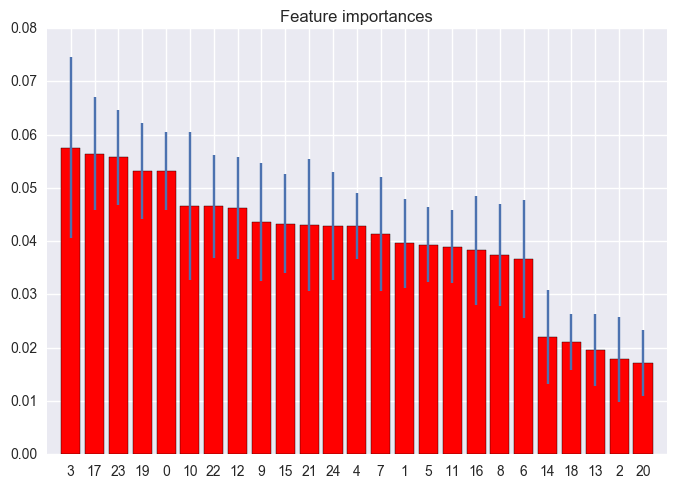

In [363]:
rf.fit(X, y)
    
    
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

cols = rf_input_data.columns
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature n° %d %s (%f)" % (f + 1, indices[f], cols[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()    